## Semi supervised Learning Prelude

*We all have come across semi-supervised learning as a type of machine learning problem. But it is a concept not understood really well. It’s best to understand this by getting our hands dirty and precisely that’s what we are bringing on.*

* We are working on a classification problem
* The use-case is simple, we have some data that maybe 100 observations, and out of that 30 are labeled (Supervised), the rest are unlabelled (Unsupervised)
* I think all of you will agree that the performance that can be achieved by training on 30 cases or observations will be lesser if we could have used all 100 observations, unfortunately, 70 of them are unlabeled.

# Steps

* Step 1: Build a classifier on the labeled data (routine stuff)
* Step 2: Use this to predict the labels of the unlabeled data. However, apart from the prediction, you also check your confidence level.
* Step 3: Add those observations to the training data on which you are super confident. These are called as pseudo-labeled as contrasted to labeled data.
* Step 4: Use this augmented dataset, now for training, and use this model.


**As we are using the unsupervised data to augment the training data for supervised learning, this comes somewhere in between and hence the name semi-supervised.**


## Importing the library and the datasets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
X, y = datasets.load_wine(return_X_y=True)

In [ ]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
X[0:1]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03]])

## Dividing the dataset train (labeled), unl(Unlabeled)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.30, random_state=90) 
X_train, X_unl, y_train, y_unl =  train_test_split(X_train,y_train,test_size=0.7, random_state=90)  

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_unl.shape)
print(y_test.shape)

(37, 13)
(54, 13)
(87, 13)
(54,)


## Training on the labeled set

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C=1.0, kernel='linear', probability=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9259259259259259

## predire les probabilites de chaque classe, et les labels des donnees non labelisees.

In [ ]:
clp= clf.predict_proba(X_unl)
lab= clf.predict(X_unl)
lab

array([2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1,
       2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0])

In [ ]:
clp.shape

(87, 3)

## Construire un dataframe qui va contenir 6 colonnes, les trois probalite de chaque classe, les vrai labels, les labels predit et une colonne max qui va afficher la prob maximale parmi les 03 de chaque classe.

In [ ]:
cls=  np.amax(clp, axis=1).reshape((clp.shape[0],1))
y_unl = y_unl.reshape((y_unl.shape[0],1))
lab = lab.reshape((lab.shape[0],1))
dataa = np.concatenate((clp, lab, y_unl,cls), axis=1)

In [ ]:
df = pd.DataFrame(data =dataa , columns=['C1Prob','C2Prob',	'C3Prob',	'lab',	'actual',	'max'])

In [ ]:
df.head(5)

,C1Prob,C2Prob,C3Prob,lab,actual,max
0,0.198217,0.105637,0.696146,2.0,2.0,0.696146
1,0.143366,0.430444,0.426190,2.0,2.0,0.430444
2,0.209890,0.132525,0.657585,2.0,2.0,0.657585
3,0.129253,0.813564,0.057183,1.0,1.0,0.813564
4,0.134173,0.787802,0.078025,1.0,1.0,0.787802


## Plotting the confidence 

(array([ 8., 14., 10., 12.,  5.,  5.,  6., 11.,  8.,  8.]),
 array([0.3482348, 0.3947677, 0.4413006, 0.4878335, 0.5343664, 0.5808993,
        0.6274322, 0.6739651, 0.720498 , 0.7670309, 0.8135638]),
 <a list of 10 Patch objects>)

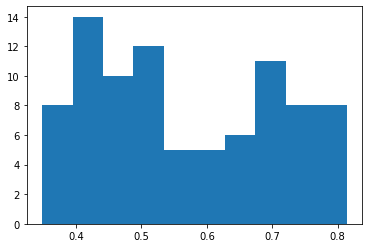

In [ ]:
plt.hist(df["max"])

## Choosing the right confidence level

In [ ]:
y_train = y_train.reshape((y_train.shape[0],1))

In [ ]:
print(X_train.shape)

(37, 13)


In [ ]:
number=np.arange(.35,1,.03)
acc=np.empty(22)
i=0
for k in number:
    conf_ind=df["max"]> k
    X_train1 = np.concatenate((X_train, X_unl[conf_ind]), axis=0)
    y_train1 = np.concatenate((y_train, lab[conf_ind]), axis=0)
    clf = svm.SVC(C=1.0, kernel='linear', probability=True)
    clf.fit(X_train1, y_train1.ravel())
    acc[i]=  clf.score(X_test, y_test.ravel())
    i = i + 1

In [ ]:
print(X_train1.shape)

(37, 13)


## Confidence vs Accuracy

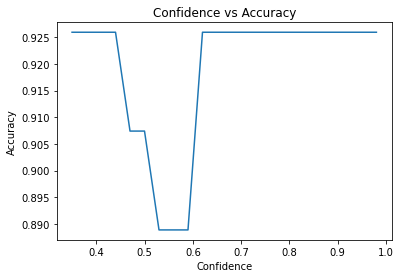

In [ ]:
import matplotlib.pyplot as plt
x= pd.Series(acc,index=number)
x.plot()
plt.title('Confidence vs Accuracy')
plt.xlabel('Confidence')
plt.ylabel('Accuracy')
plt.show() 